<a href="https://colab.research.google.com/github/shashi3876/Ottawa_Data/blob/main/Ottawa_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of City of Ottawa Monthly Service Data

In this notebook, I'm analyzing the monthly service data released by city of Ottawa. These data is freely available on the data [portal](https://open.ottawa.ca/search?collection=Dataset&q=service) offered by city of Ottawa. The data portal states the following regarding these data.

*The data provides a summary of requests for service that require action by City staff.The data provides a summary of requests for service that require action by City staff. Data is presented by ward and shows the responsible City department and service request description.*

I have downloaded the available service call data in to my google drive. Lets load these data for year 2019.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/content/gdrive/My Drive/Colab Notebooks/Data/2022_Monthly_Service_Requests.csv'
records = pd.read_csv(file_path)#,encoding='utf16')

In [3]:
records.head()

,SUBJECT,REASON,TYPE,DATE_RAISED,CHANNEL,WARD,ObjectId
0,Bylaw Services | Service des Règlements Munici...,Animals,Dog Barking,08-Jan-22,Voice In,RIVER,1
1,Bylaw Services | Service des Règlements Munici...,Animals,Dog Barking,09-Jan-22,Voice In,ORLÉANS,2
2,Bylaw Services | Service des Règlements Munici...,Animals,Dog Barking,09-Jan-22,Voice In,BAY,3
3,Bylaw Services | Service des Règlements Munici...,Animals,Dog Barking,09-Jan-22,Voice In,GLOUCESTER-SOUTHGATE,4
4,Bylaw Services | Service des Règlements Munici...,Animals,Dog Barking,09-Jan-22,WEB,ORL&#201;ANS,5


# Cleaning Data

Currentluy there are 23 wards in [Ottawa](https://en.wikipedia.org/wiki/Wards_of_the_City_of_Ottawa#:~:text=There%20are%2023%20wards%20in%20Ottawa.). However, if we look at the Ward column in our dataframe there are 52 unique values.

In [4]:
print(len(records["WARD"].unique()))
print(records["WARD"].unique())
records["WARD"].isna().sum()

52
['RIVER' 'ORLÉANS' 'BAY' 'GLOUCESTER-SOUTHGATE' 'ORL&#201;ANS'
 'BEACON HILL-CYRVILLE' 'RIDEAU-ROCKCLIFFE' 'ALTA VISTA' 'INNES'
 'CUMBERLAND' 'KANATA NORTH' 'KITCHISSIPPI' 'COLLEGE' 'SOMERSET'
 'BARRHAVEN' 'KNOXDALE-MERIVALE' 'RIDEAU-VANIER' 'GLOUCESTER-SOUTH NEPEAN'
 'OSGOODE' 'STITTSVILLE' 'KANATA SOUTH' 'CAPITAL' 'WEST CARLETON-MARCH'
 'RIDEAU-GOULBOURN' nan 'Ward 3 BARRHAVEN' 'Ward 7 BAY' 'Ward 17 CAPITAL'
 'Ward 9 KNOXDALE-MERIVALE' 'Ward 10 GLOUCESTER-SOUTHGATE'
 'Ward 23 KANATA SOUTH' 'Ward 1 ORLÉANS' 'Ward 15 KITCHISSIPPI'
 'Ward 21 RIDEAU-GOULBOURN' 'Ward 4 KANATA NORTH' 'Ward 12 RIDEAU-VANIER'
 'Ward 22 GLOUCESTER-SOUTH NEPEAN' 'Ward 18 ALTA VISTA' 'Ward 2 INNES'
 'Ward 8 COLLEGE' 'Ward 16 RIVER' 'Ward 13 RIDEAU-ROCKCLIFFE'
 'Ward 14 SOMERSET' 'Ward 19 CUMBERLAND' 'Ward 5 WEST CARLETON-MARCH'
 'Ward 20 OSGOODE' 'Ward 6 STITTSVILLE' ' ' 'Ward 11 BEACON HILL-CYRVILLE'
 'Ward 17 West' 'Ward 12 East' 'WARD 12 RIDEAU-VANIER']


10043

When looked at the results it seems some of the wards are mentioned in differant ways. As an example, Capital ward is given as "CAPITAL" as well as "Ward 17 CAPITAL". Following code will process the Ward column and match them to only 23 actual words represented as "Ward X WARD_Name" format. Also Nan values and empty string values are replaced with value "NONE".

In [5]:
Wards=['Ward 1 ORLÉANS','Ward 2 INNES', 'Ward 3 BARRHAVEN','Ward 4 KANATA NORTH','Ward 5 WEST CARLETON-MARCH',
       'Ward 6 STITTSVILLE','Ward 7 BAY','Ward 8 COLLEGE','Ward 9 KNOXDALE-MERIVALE','Ward 10 GLOUCESTER-SOUTHGATE',
       'Ward 11 BEACON HILL-CYRVILLE','Ward 12 RIDEAU-VANIER','Ward 13 RIDEAU-ROCKCLIFFE', 'Ward 14 SOMERSET','Ward 15 KITCHISSIPPI',
       'Ward 16 RIVER','Ward 17 CAPITAL', 'Ward 18 ALTA VISTA', 'Ward 19 CUMBERLAND', 'Ward 20 OSGOODE',
       'Ward 21 RIDEAU-GOULBOURN', 'Ward 22 GLOUCESTER-SOUTH NEPEAN', 'Ward 23 KANATA SOUTH'];

mapping={'RIVER':'Ward 16 RIVER', 'ORLÉANS':'Ward 1 ORLÉANS', 'BAY':'Ward 7 BAY', 'GLOUCESTER-SOUTHGATE':'Ward 22 GLOUCESTER-SOUTH NEPEAN', 'ORL&#201;ANS':'Ward 1 ORLÉANS',
       'BEACON HILL-CYRVILLE':'Ward 11 BEACON HILL-CYRVILLE', 'RIDEAU-ROCKCLIFFE':'Ward 13 RIDEAU-ROCKCLIFFE', 'ALTA VISTA':'Ward 18 ALTA VISTA', 'INNES':'Ward 2 INNES',
       'CUMBERLAND':'Ward 19 CUMBERLAND', 'KANATA NORTH':'Ward 4 KANATA NORTH', 'KITCHISSIPPI':'Ward 15 KITCHISSIPPI', 'COLLEGE':'Ward 8 COLLEGE',
       'SOMERSET': 'Ward 14 SOMERSET', 'BARRHAVEN': 'Ward 3 BARRHAVEN', 'KNOXDALE-MERIVALE':'Ward 9 KNOXDALE-MERIVALE', 'RIDEAU-VANIER':'Ward 12 RIDEAU-VANIER',
       'WARD 12 RIDEAU-VANIER':'Ward 12 RIDEAU-VANIER',
       'GLOUCESTER-SOUTH NEPEAN':'Ward 22 GLOUCESTER-SOUTH NEPEAN', 'OSGOODE':'Ward 20 OSGOODE', 'STITTSVILLE':'Ward 6 STITTSVILLE',
       'KANATA SOUTH':'Ward 23 KANATA SOUTH', 'CAPITAL':'Ward 17 CAPITAL', 'WEST CARLETON-MARCH':'Ward 5 WEST CARLETON-MARCH',
       'RIDEAU-GOULBOURN':'Ward 21 RIDEAU-GOULBOURN',
       'Ward 17 West':'Ward 17 CAPITAL', 'Ward 12 East':'Ward 12 RIDEAU-VANIER',' ':'NONE'}

def clean_ward(name):
  if pd.isnull(name):
    return "NONE"
  if name in Wards:
    return name;
  else:
    return mapping[name]
records["WARD"]=records["WARD"].apply(clean_ward)
len(records["WARD"].unique())

24

In [6]:
records.isna().sum()

SUBJECT         0
REASON          0
TYPE            0
DATE_RAISED     0
CHANNEL        75
WARD            0
ObjectId        0
dtype: int64

# Loading population data

The above dataframe only contains the service calls and the relevent ward. But some wards may be bigger and may have different populations. Thus, for a clear analysis, mor information is required regarding the population and the size of each ward. Fortunately these [data](https://open.ottawa.ca/datasets/ottawa::population-household-estimates-by-ward-mid-2021/explore?location=45.248840%2C-75.801082%2C1.56) is freely available on the same portal. Let's load these data now. 

In [7]:
file_path = '/content/gdrive/My Drive/Colab Notebooks/Data/Population_by_Ward_2021.csv'
ward_info = pd.read_csv(file_path)#,encoding='utf16')
ward_info.head()

,OBJECTID,WARD_NUM,NAME_EN,NAME_FR,WARD_EN,WARD_FR,POPULATION,HOUSEHOLDS_M_NAGE
0,1,23,Ward 23,Quartier 23,KANATA SOUTH,KANATA-SUD,49680,19000
1,2,7,Ward 7,Quartier 7,BAY,BAIE,45590,21330
2,3,20,Ward 20,Quartier 20,OSGOODE,OSGOODE,30390,10760
3,4,11,Ward 11,Quartier 11,BEACON HILL-CYRVILLE,BEACON HILL-CYRVILLE,34030,14420
4,5,8,Ward 8,Quartier 8,COLLEGE,COLLÈGE,52080,22480


For the moment we'll keep these two dataframes seperately. We'll utilize data on this dataframe when needed.

# Analyze the Channel

We'll start our analysis with the CHANNEL column. This column specifies which medium was used to report the service request. This column have four different values where WEB stands for service requests done through the website via computer and WAP stands for requests received through web via a phone or a tab. Other two catagories are self explanatory. Lets see this distribution for the whole dataset.

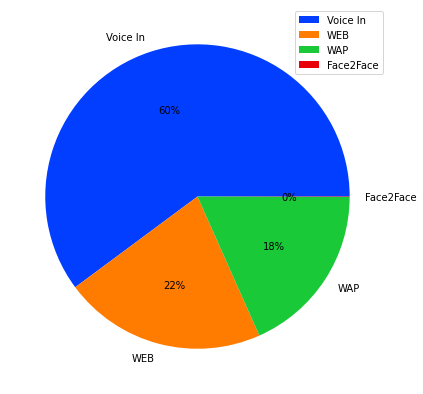

In [8]:
channel_data=records.CHANNEL.value_counts()
colors = sns.color_palette('bright')[0:4]

plt.figure(figsize = (7,7))
plt.pie(channel_data, labels=channel_data.index,colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

As seen above most of the requests come through calls. The web based requests are almost equally distributed between computer and tab/cell phones. Now lets see wheter the channel used for service request depends on the ward. 

To do the above analysis, first we have to find the Channel distribution for each ward. It will be easier if we can get a table where each row coresponds to the channel and each column corresponds to the ward and the data will be the total number of requests for each ward under each category.

Although the initial intuition is to use pivot_table() or groupby() followed by count_value(), less famous funtion named [crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) in pandas helps to achieve this task. Let's utilize this function and get a table consisiting of channel as rows and the wards as columns.

In [9]:
table=pd.crosstab(records.CHANNEL,records.WARD)
table.head()

WARD,NONE,Ward 1 ORLÉANS,Ward 10 GLOUCESTER-SOUTHGATE,Ward 11 BEACON HILL-CYRVILLE,Ward 12 RIDEAU-VANIER,Ward 13 RIDEAU-ROCKCLIFFE,Ward 14 SOMERSET,Ward 15 KITCHISSIPPI,Ward 16 RIVER,Ward 17 CAPITAL,...,Ward 21 RIDEAU-GOULBOURN,Ward 22 GLOUCESTER-SOUTH NEPEAN,Ward 23 KANATA SOUTH,Ward 3 BARRHAVEN,Ward 4 KANATA NORTH,Ward 5 WEST CARLETON-MARCH,Ward 6 STITTSVILLE,Ward 7 BAY,Ward 8 COLLEGE,Ward 9 KNOXDALE-MERIVALE
CHANNEL,,,,,,,,,,,,,,,,,,,,,
Face2Face,11,13,0,0,2,5,3,2,3,4,...,0,8,5,3,1,0,0,4,6,3
Voice In,6861,5699,959,4022,10657,6546,10194,7658,6884,7044,...,4110,11812,5571,6635,3882,3161,5166,5424,7365,5746
WAP,1244,1656,0,998,2241,1376,2022,2448,1781,2531,...,1649,4778,2160,3085,1579,832,2270,1263,2150,1319
WEB,1917,1950,0,1369,2560,2239,2439,3111,2123,3026,...,1778,4787,2503,3160,2276,1178,2460,1550,2510,1692


It seems like data for Ward 10 is missing as we dont see any numbers for WAP and WEB traffics. Furthermore we have to get rid of the None column. Also the number of service requests received through Face2Face channel is very low. So lets remove the corresponding columns and the row from our dataset.

In [10]:
table=table.drop(columns=["Ward 10 GLOUCESTER-SOUTHGATE","NONE"])
table=table.drop(["Face2Face"])
table.head()

WARD,Ward 1 ORLÉANS,Ward 11 BEACON HILL-CYRVILLE,Ward 12 RIDEAU-VANIER,Ward 13 RIDEAU-ROCKCLIFFE,Ward 14 SOMERSET,Ward 15 KITCHISSIPPI,Ward 16 RIVER,Ward 17 CAPITAL,Ward 18 ALTA VISTA,Ward 19 CUMBERLAND,...,Ward 21 RIDEAU-GOULBOURN,Ward 22 GLOUCESTER-SOUTH NEPEAN,Ward 23 KANATA SOUTH,Ward 3 BARRHAVEN,Ward 4 KANATA NORTH,Ward 5 WEST CARLETON-MARCH,Ward 6 STITTSVILLE,Ward 7 BAY,Ward 8 COLLEGE,Ward 9 KNOXDALE-MERIVALE
CHANNEL,,,,,,,,,,,,,,,,,,,,,
Voice In,5699,4022,10657,6546,10194,7658,6884,7044,6567,6758,...,4110,11812,5571,6635,3882,3161,5166,5424,7365,5746
WAP,1656,998,2241,1376,2022,2448,1781,2531,1895,2456,...,1649,4778,2160,3085,1579,832,2270,1263,2150,1319
WEB,1950,1369,2560,2239,2439,3111,2123,3026,2269,2611,...,1778,4787,2503,3160,2276,1178,2460,1550,2510,1692



# Chi-squared analysis

Here we are using the chi-squared analysis codes given in scipy to check whether channel used to report and the ward they reside is independent. For this task we are using [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) method from scipy.

In [11]:
import scipy.stats as stats

chi2, p, dof, ex=stats.chi2_contingency(table)

print(f'The p-value is {p} with {dof} degrees of freedom')


The p-value is 0.0 with 42 degrees of freedom


The p-value for the above method is 0 and it shows that that the variables WARDS and CHANNEL are independent of each other. In other words, the distribution of the channel used to make the service call does not depend on the ward at all.

# Analysis using the researchpy library

The [researchpy](https://researchpy.readthedocs.io/en/latest/) library is a  wrapper that combines various packages to easily calculate variuos statistics for academic purposes. This library contains the chi-squared test where only the raw dataframe has to be passed as an input.

In [12]:
!pip install researchpy
import researchpy as rp
crosstab, test_results,expected=rp.crosstab(records.CHANNEL,records.WARD,test="chi-square",expected_freqs=True,prop="cell")
test_results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Chi-square test,results
0,Pearson Chi-square ( 69.0) =,4527.4455
1,p-value =,0.0000
2,Cramer's V =,0.0785


# Cluster Wards Acording to the distribution

As it is clear that, the distribution of channel is different for different wards. Athough chi-squared test helps us to check whetehr they are from the same distribtions, it does not help with identifying similar groups. Here we are using clustering methods to identify the similarity between different wards.

In [13]:
crosstab, test_results,expected=rp.crosstab(records.REASON,records.TYPE,test="chi-square",expected_freqs=True,prop="cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 37230.0) =,2.029351e+07
1,p-value =,0.000000e+00
2,Cramer's V =,9.876000e-01
